# 02 - Exploratory analysis

This notebook performs a first exploratory analysis on the synthetic pricing dataset.

It focuses on:
- Basic structure and sanity checks
- Key KPIs by country, channel and currency
- Initial view on margin and volume relationships

All figures are expressed in EUR when using `turnover_eur`, `gp_eur` and `ATV_eur`.


In [1]:
# ============================================
# Imports and data loading
# ============================================

import pandas as pd
import plotly.express as px

# Load synthetic dataset generated in 01_data_simulation.ipynb
df = pd.read_csv("../data/synthetic_pricing_daily.csv")

print("Dataset loaded.")
print("Shape:", df.shape)
df.head()

Dataset loaded.
Shape: (87600, 17)


date country   branch  channel currency direction        pax  \
0  2025-01-01      UK  UK_BR_1  Airport      USD       BUY   8.351035   
1  2025-01-02      UK  UK_BR_1  Airport      USD       BUY  11.845798   
2  2025-01-03      UK  UK_BR_1  Airport      USD       BUY  10.517861   
3  2025-01-04      UK  UK_BR_1  Airport      USD       BUY  13.025900   
4  2025-01-05      UK  UK_BR_1  Airport      USD       BUY   9.360628   

   transactions  hit_rate         ATV     ATV_eur     turnover  turnover_eur  \
0      5.764567  0.690282  584.031181  584.031181  3366.686624   3366.686624   
1      7.934054  0.669778  555.653840  555.653840  4408.587718   4408.587718   
2      6.727631  0.639639  590.087078  590.087078  3969.888154   3969.888154   
3     10.733102  0.823982  570.959926  570.959926  6128.170972   6128.170972   
4      6.611397  0.706298  590.042343  590.042343  3901.004018   3901.004018   

   margin_rate          gp      gp_eur    gp_pct  
0     0.114133  384.250110  384.250110  0.114133  
1     0.098343  433.552656  433.552656  0.098343  
2     0.111882  444.160582  444.160582  0.111882  
3     0.112462  689.187681  689.187681  0.112462  
4     0.114581  446.981938  446.981938  0.114581

In [2]:
# ============================================
# Basic dataset inspection
# ============================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          87600 non-null  object 
 1   country       87600 non-null  object 
 2   branch        87600 non-null  object 
 3   channel       87600 non-null  object 
 4   currency      87600 non-null  object 
 5   direction     87600 non-null  object 
 6   pax           87600 non-null  float64
 7   transactions  87600 non-null  float64
 8   hit_rate      87600 non-null  float64
 9   ATV           87600 non-null  float64
 10  ATV_eur       87600 non-null  float64
 11  turnover      87600 non-null  float64
 12  turnover_eur  87600 non-null  float64
 13  margin_rate   87600 non-null  float64
 14  gp            87600 non-null  float64
 15  gp_eur        87600 non-null  float64
 16  gp_pct        87600 non-null  float64
dtypes: float64(11), object(6)
memory usage: 11.4+ MB


In [3]:
df.describe(include="all").T

count unique         top   freq         mean          std  \
date            87600    365  2025-01-01    240          NaN          NaN   
country         87600      4          UK  21900          NaN          NaN   
branch          87600     12     UK_BR_1   7300          NaN          NaN   
channel         87600      2     Airport  43800          NaN          NaN   
currency        87600      5         USD  17520          NaN          NaN   
direction       87600      2         BUY  43800          NaN          NaN   
pax           87600.0    NaN         NaN    NaN     5.358508     3.270537   
transactions  87600.0    NaN         NaN    NaN     3.971575     2.373821   
hit_rate      87600.0    NaN         NaN    NaN     0.749747      0.08135   
ATV           87600.0    NaN         NaN    NaN   497.603697    56.958672   
ATV_eur       87600.0    NaN         NaN    NaN   497.603697    56.958672   
turnover      87600.0    NaN         NaN    NaN  1997.572668  1274.390215   
turnover_eur  87600.0    NaN         NaN    NaN  1997.572668  1274.390215   
margin_rate   87600.0    NaN         NaN    NaN     0.095379     0.013288   
gp            87600.0    NaN         NaN    NaN   190.709998   124.887371   
gp_eur        87600.0    NaN         NaN    NaN   190.709998   124.887371   
gp_pct        87600.0    NaN         NaN    NaN     0.095379     0.013288   

                     min         25%          50%          75%           max  
date                 NaN         NaN          NaN          NaN           NaN  
country              NaN         NaN          NaN          NaN           NaN  
branch               NaN         NaN          NaN          NaN           NaN  
channel              NaN         NaN          NaN          NaN           NaN  
currency             NaN         NaN          NaN          NaN           NaN  
direction            NaN         NaN          NaN          NaN           NaN  
pax             1.100011    2.830443     4.772954      7.19072     31.016332  
transactions         1.0    2.129803     3.560288      5.34615     20.184805  
hit_rate        0.625003    0.678285     0.741263     0.817273      0.909089  
ATV            313.62567  457.154729   497.328727    536.55022    762.613779  
ATV_eur        313.62567  457.154729   497.328727    536.55022    762.613779  
turnover      110.613791   991.60507  1785.306874  2714.835595  10743.784704  
turnover_eur  110.613791   991.60507  1785.306874  2714.835595  10743.784704  
margin_rate         0.06    0.085204     0.095373     0.105534      0.139713  
gp             12.430646   92.962518   168.805216   259.087232    984.686315  
gp_eur         12.430646   92.962518   168.805216   259.087232    984.686315  
gp_pct              0.06    0.085204     0.095373     0.105534      0.139713

In [4]:
# ============================================
# KPIs by country (in EUR)
# ============================================

country_summary = (
    df.groupby("country")[["turnover_eur", "gp_eur"]]
      .sum()
      .assign(gp_pct_eur=lambda d: d["gp_eur"] / d["turnover_eur"])
      .sort_values("gp_eur", ascending=False)
)

country_summary

turnover_eur        gp_eur  gp_pct_eur
country                                        
UK       4.993741e+07  4.783925e+06    0.095798
SG       4.524734e+07  4.327696e+06    0.095645
AU       4.160781e+07  3.955403e+06    0.095064
ES       3.819481e+07  3.639173e+06    0.095279

C:\Users\ES00683510\AppData\Local\anaconda3\Lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




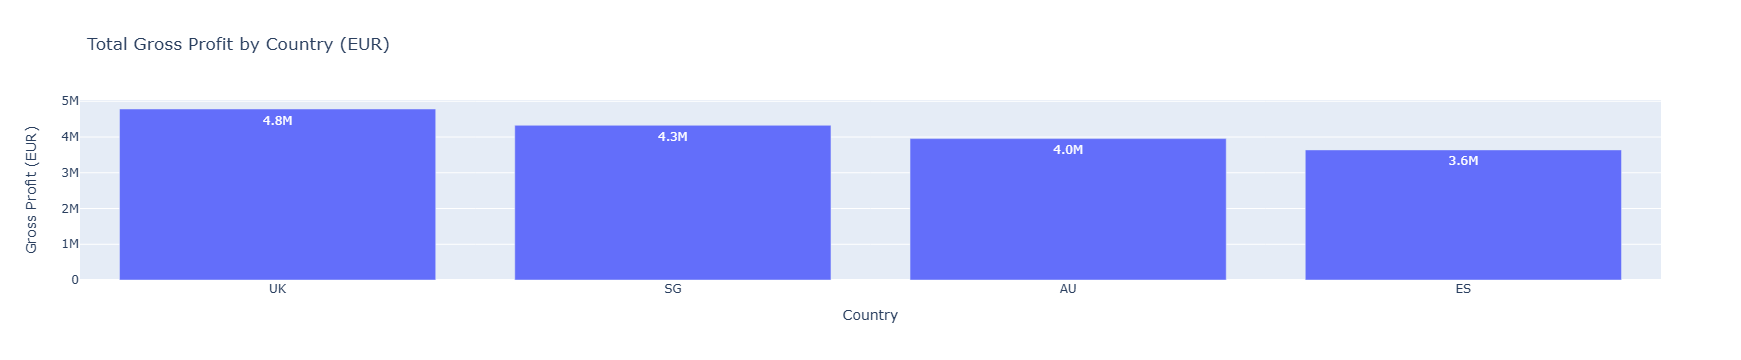

In [5]:
fig = px.bar(
    country_summary.reset_index(),
    x="country",
    y="gp_eur",
    title="Total Gross Profit by Country (EUR)",
    text_auto=".2s"
)

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Gross Profit (EUR)"
)

fig.show()

In [6]:
# ============================================
# KPIs by channel (in EUR)
# ============================================

channel_summary = (
    df.groupby("channel")[["turnover_eur", "gp_eur"]]
      .sum()
      .assign(gp_pct_eur=lambda d: d["gp_eur"] / d["turnover_eur"])
      .sort_values("gp_eur", ascending=False)
)

channel_summary

turnover_eur        gp_eur  gp_pct_eur
channel                                            
Airport      9.941373e+07  9.940940e+06    0.099996
High Street  7.557364e+07  6.765256e+06    0.089519

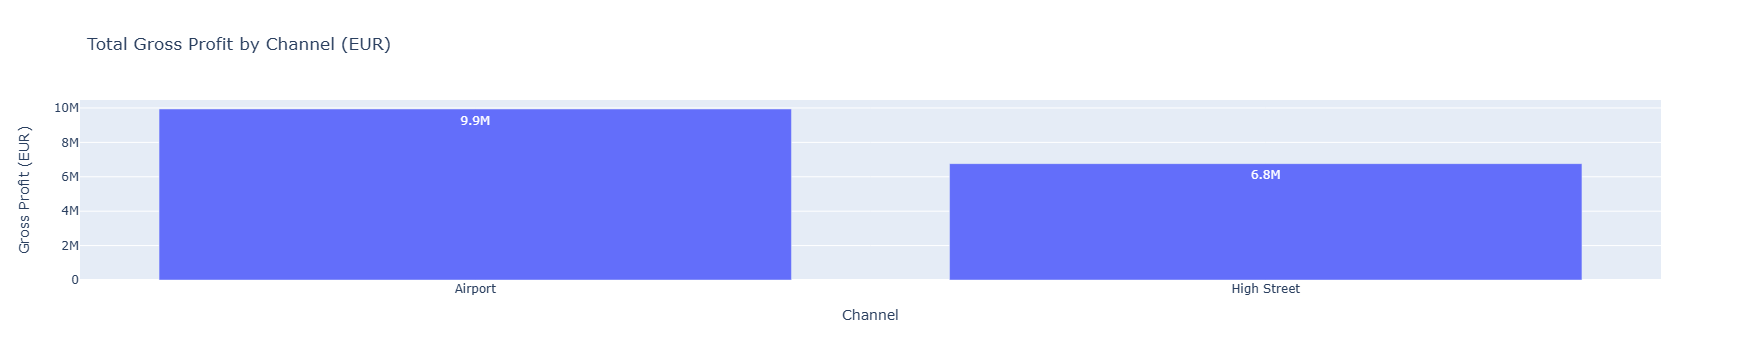

In [7]:
fig = px.bar(
    channel_summary.reset_index(),
    x="channel",
    y="gp_eur",
    title="Total Gross Profit by Channel (EUR)",
    text_auto=".2s"
)

fig.update_layout(
    xaxis_title="Channel",
    yaxis_title="Gross Profit (EUR)"
)

fig.show()

In [8]:
# ============================================
# KPIs by currency (in EUR)
# ============================================

currency_summary = (
    df.groupby("currency")[["turnover_eur", "gp_eur"]]
      .sum()
      .assign(gp_pct_eur=lambda d: d["gp_eur"] / d["turnover_eur"])
      .sort_values("gp_eur", ascending=False)
)

currency_summary

turnover_eur        gp_eur  gp_pct_eur
currency                                        
USD       5.761633e+07  5.565053e+06    0.096588
EUR       4.515097e+07  4.268107e+06    0.094530
GBP       3.308263e+07  3.229153e+06    0.097609
JPY       2.206596e+07  2.063091e+06    0.093497
AUD       1.707148e+07  1.580792e+06    0.092598

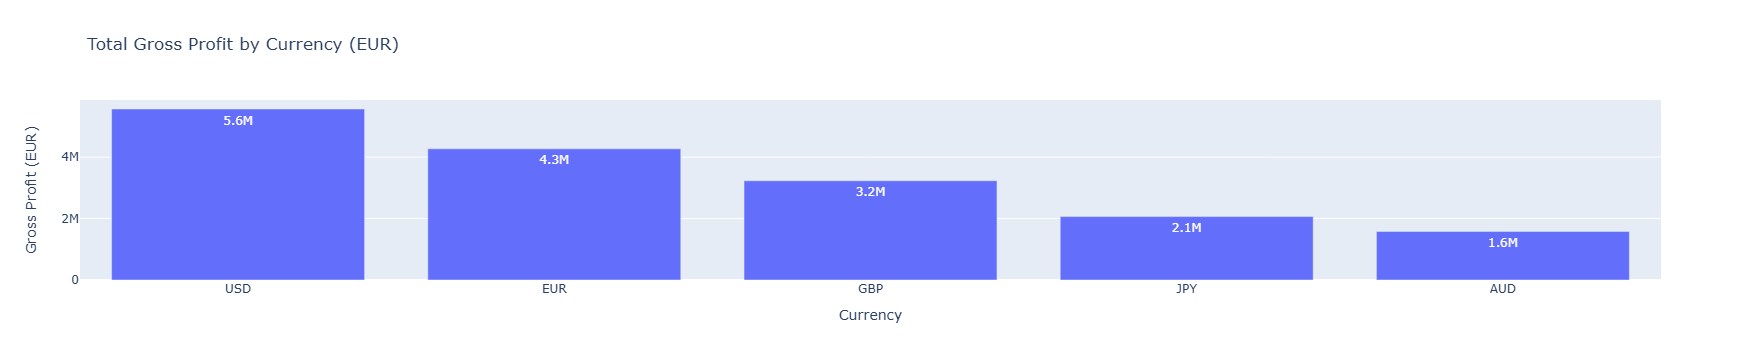

In [9]:
fig = px.bar(
    currency_summary.reset_index(),
    x="currency",
    y="gp_eur",
    title="Total Gross Profit by Currency (EUR)",
    text_auto=".2s"
)

fig.update_layout(
    xaxis_title="Currency",
    yaxis_title="Gross Profit (EUR)"
)

fig.show()

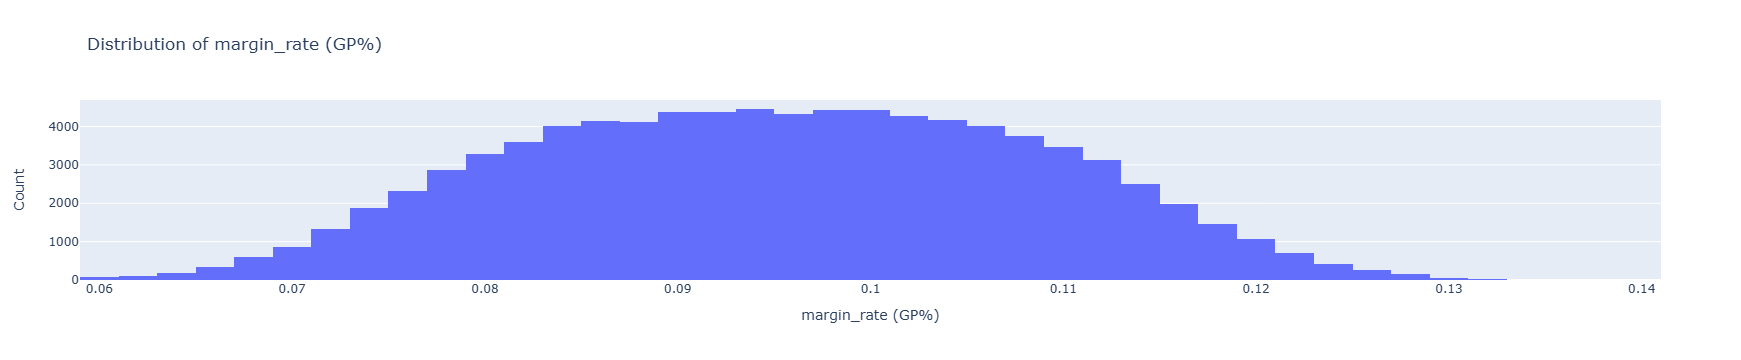

In [10]:
# ============================================
# Distribution of margin_rate (GP%)
# ============================================

fig = px.histogram(
    df,
    x="margin_rate",
    nbins=40,
    title="Distribution of margin_rate (GP%)"
)

fig.update_layout(
    xaxis_title="margin_rate (GP%)",
    yaxis_title="Count"
)

fig.show()

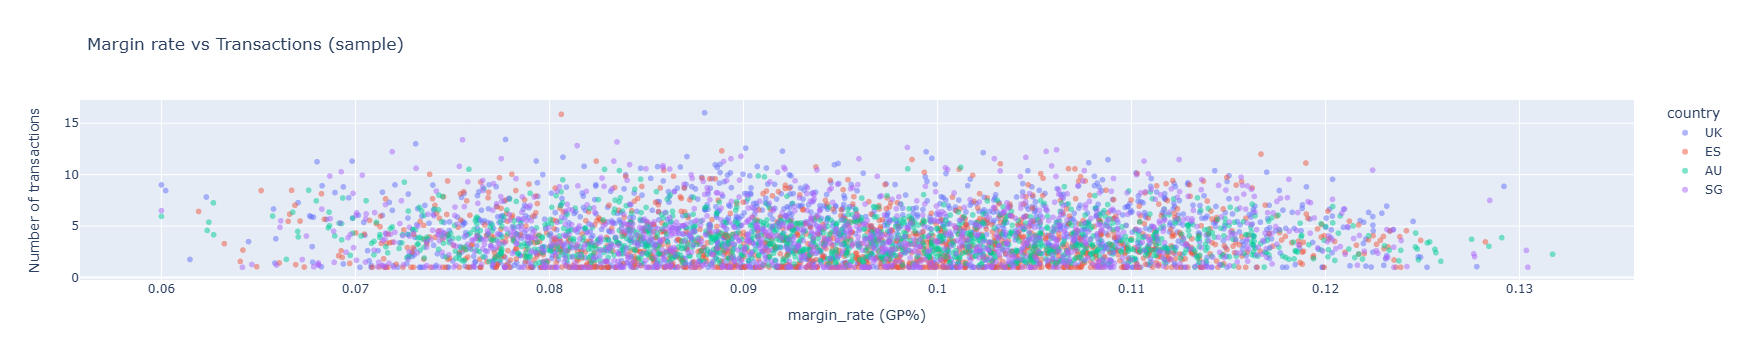

In [11]:
# ============================================
# Margin vs Transactions (sample)
# ============================================

sample_size = min(5000, len(df))
sample_df = df.sample(sample_size, random_state=42)

fig = px.scatter(
    sample_df,
    x="margin_rate",
    y="transactions",
    color="country",
    opacity=0.5,
    title="Margin rate vs Transactions (sample)"
)

fig.update_layout(
    xaxis_title="margin_rate (GP%)",
    yaxis_title="Number of transactions"
)

fig.show()